Referencia a lo que sigue: [R for data science](https://r4ds.had.co.nz/)

# Visualización con [ggplot2](https://ggplot2.tidyverse.org/)

Un paquete de R que es versátil para la visualización bonita de datos es el de `ggplot2`. Tal paquete implementa *grammar of graphics* que es un sistema para describir y construir los componentes de una gráfica. Ver [The Grammar of Graphics](https://www.springer.com/gp/book/9780387245447) y [A Layered Grammar of Graphics](https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf).

In [1]:
library(ggplot2) #cargamos el paquete con la función library

## Una opción para graficar es con la función [qplot](https://ggplot2.tidyverse.org/reference/qplot.html)

Y algunas funciones para crear datos de juguete son:

### *combine*: [c](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/c)

Con *combine* creamos un vector de sus argumentos que se almacena en x. Por ejemplo:


In [2]:
x <- c(1,2, 3) #vector con valores 1, 2, 4

In [3]:
print(x)

[1] 1 2 3


### Secuencia: [seq](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/seq)

Con `seq` creamos un vector cuyos valores forman una secuencia

In [4]:
y <- seq(1, 2, .5)

In [5]:
print(y)

[1] 1.0 1.5 2.0


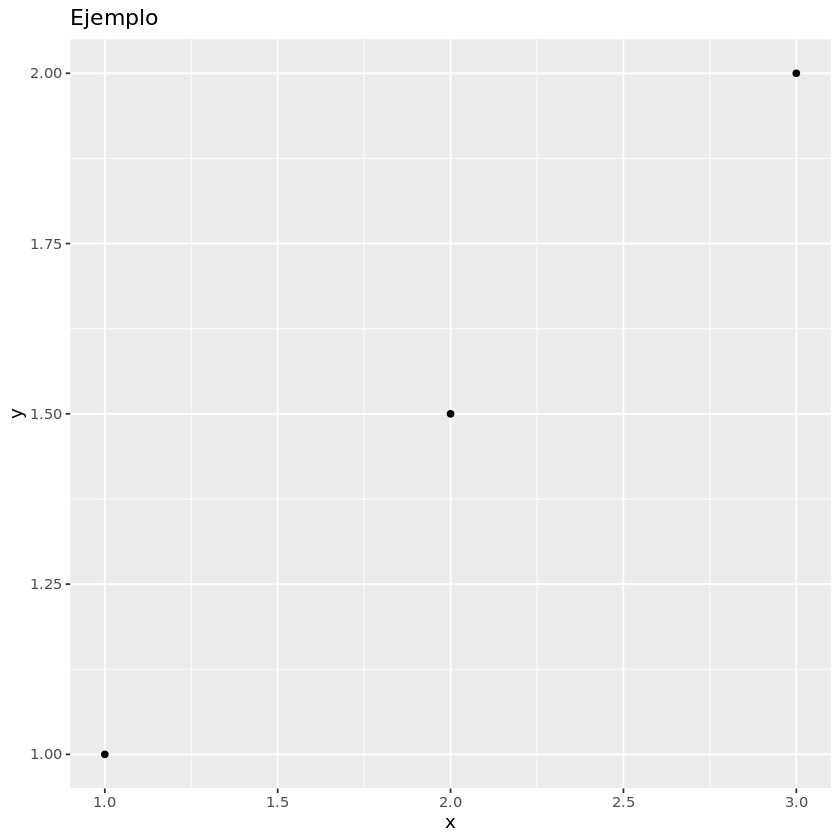

In [6]:
qplot(x = x, y = y, main = "Ejemplo") 

## Otra función para graficar más versátil es [ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html)

Con la función `ggplot` creamos un sistema de coordenadas al que le podemos colocar capas o *layers*. 

In [7]:
coordinate_system <- ggplot()

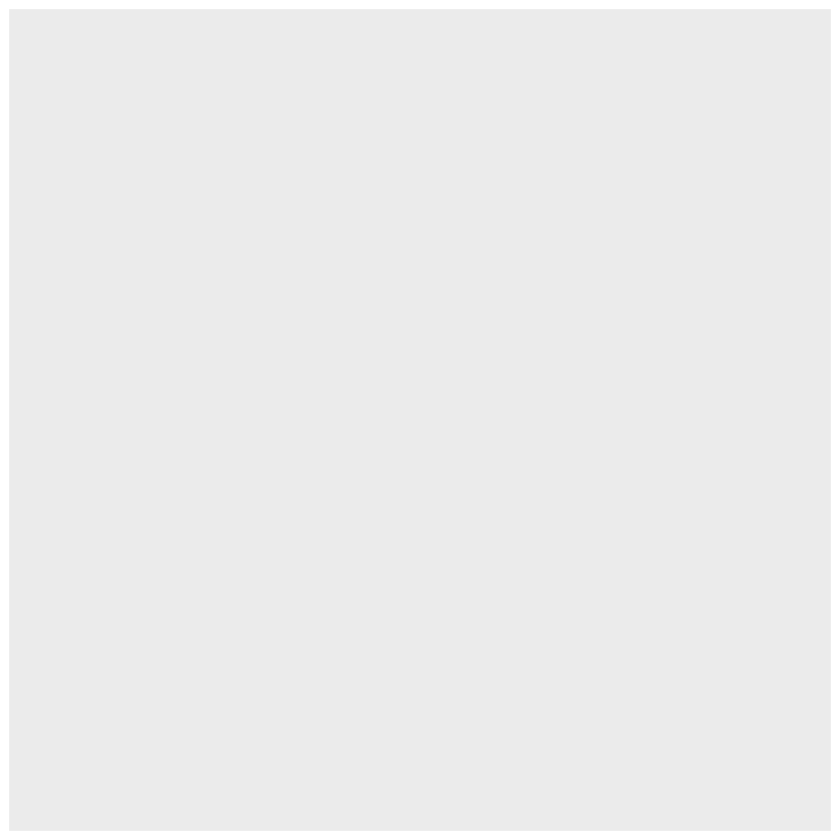

In [8]:
coordinate_system

Y para hacer una gráfica colocaremos los datos anteriores en un *data frame* el cual es una colección rectangular de variables en las columnas y observaciones en los renglones, por ejemplo:

| Variable1 | Variable 2|
|:---:|:---:|
|4| 7.5|
|-5.1|8|

En R podemos crear un *data frame* con la función [data.frame](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/data.frame)

Datos:

In [9]:
print(x)

[1] 1 2 3


In [10]:
print(y)

[1] 1.0 1.5 2.0


In [11]:
df <- data.frame(variable1 = x, variable2 = y) 

In [12]:
print(df)

  variable1 variable2
1         1       1.0
2         2       1.5
3         3       2.0


El paquete `ggplot2` tiene funciones que añaden **capas de diferentes tipo** a una gráfica. Tales funciones tienen un argumento de nombre *mapping* que define cómo se mapean las variables a **propiedades visuales** de los objetos de una gráfica. Este argumento siempre se le acompaña de la función [aes](https://ggplot2.tidyverse.org/reference/aes.html) (`aes` se refiere a *aesthetics*) que recibe argumentos para las propiedades.

Un ejemplo para añadir una **capa de puntos** a la gráfica es [geom_point](https://ggplot2.tidyverse.org/reference/geom_point.html) que crea un *scatterplot*. Los nombres `x` y `y` en la función `aes` son las **localizaciones** de los puntos cuyos valores los toman de las variables `variable1` y `variable2` del *data frame* anterior y que estarán en el eje horizontal y el eje vertical respectivamente (las localizaciones de los puntos son las propiedades visuales de la gráfica).

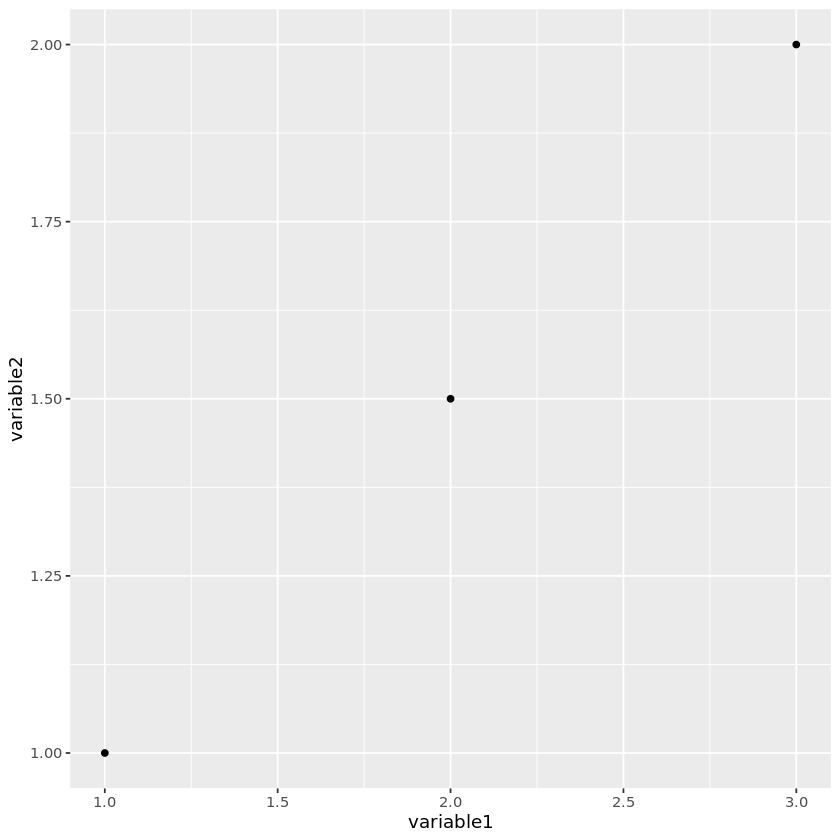

In [13]:
coordinate_system + geom_point(df, mapping = aes(x = variable1, y = variable2))

Otra forma de usar la función `ggplot` es pasarle como argumento el *data frame* directamente:

In [14]:
coordinate_system2 <- ggplot(data = df)

Esto nos permite a no pasar el *data frame* en la función `geom_point`, obsérvese que también podemos omitir el nombre `mapping` de argumento:

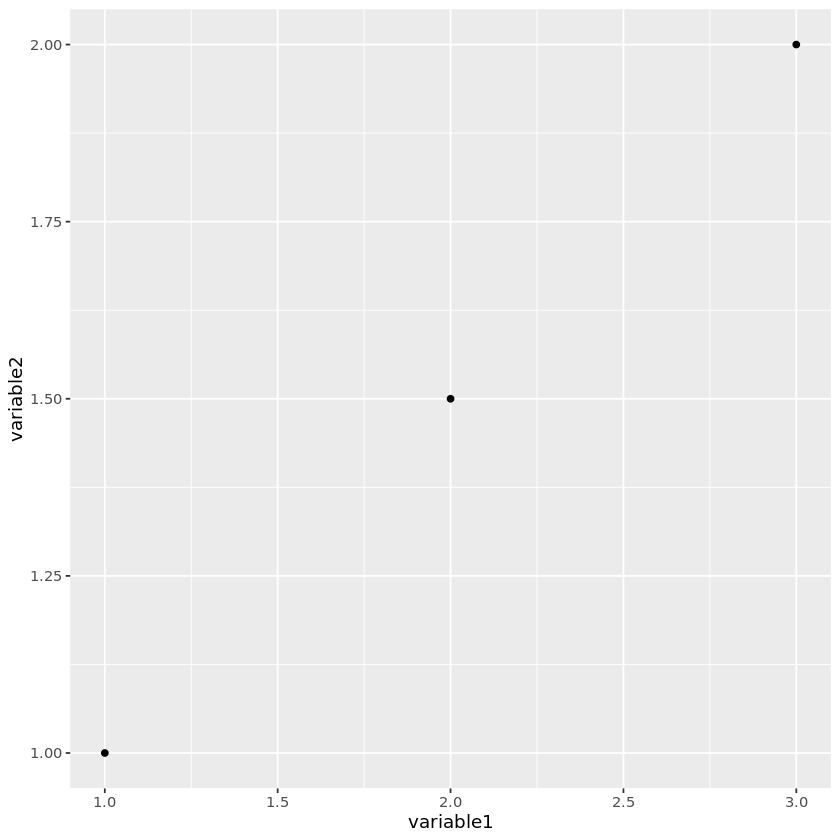

In [15]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2))

Otros *aesthetics* son **tamaño, forma o color**, por ejemplo, y podemos hacer el mapeo de alguna propiedad a alguna variable de mi *data frame*. 

In [16]:
clase <- c("clase1", "clase2", "clase1")

In [17]:
df2 <- data.frame(variable1 = x, variable2 = y, variable3=clase) 

In [18]:
print(df2)

  variable1 variable2 variable3
1         1       1.0    clase1
2         2       1.5    clase2
3         3       2.0    clase1


In [19]:
coordinate_system3 <- ggplot(data = df2)

Para el color usamos:

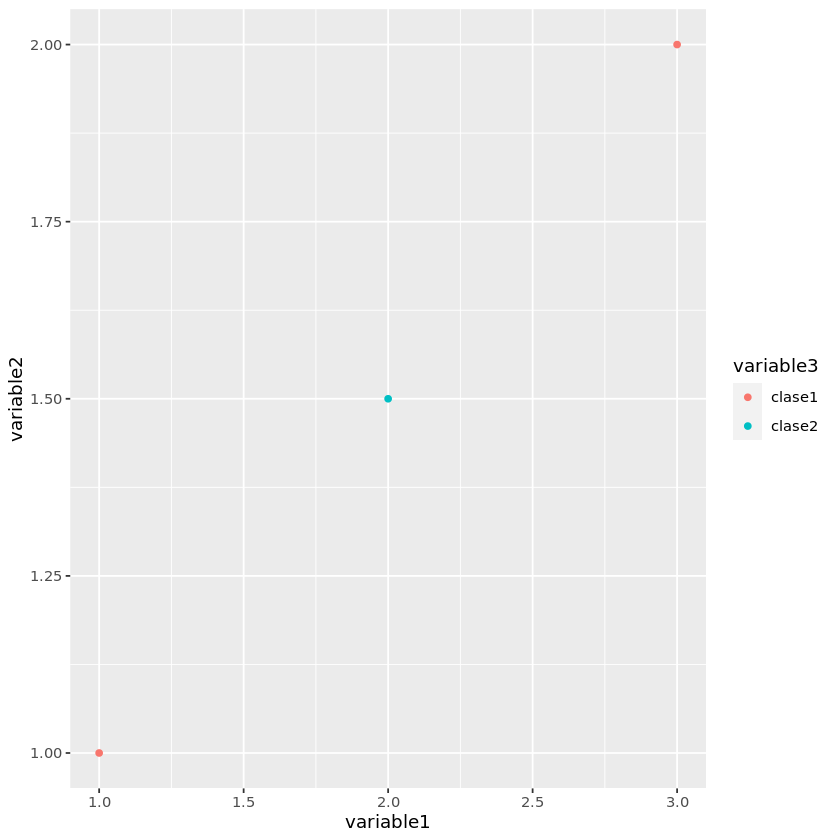

In [20]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color= variable3))

Obsérvese que se ha elegido automáticamente un **color** para cada nivel de la `variable3` que es la clase y su leyenda.

Para el **tamaño** y **color**:

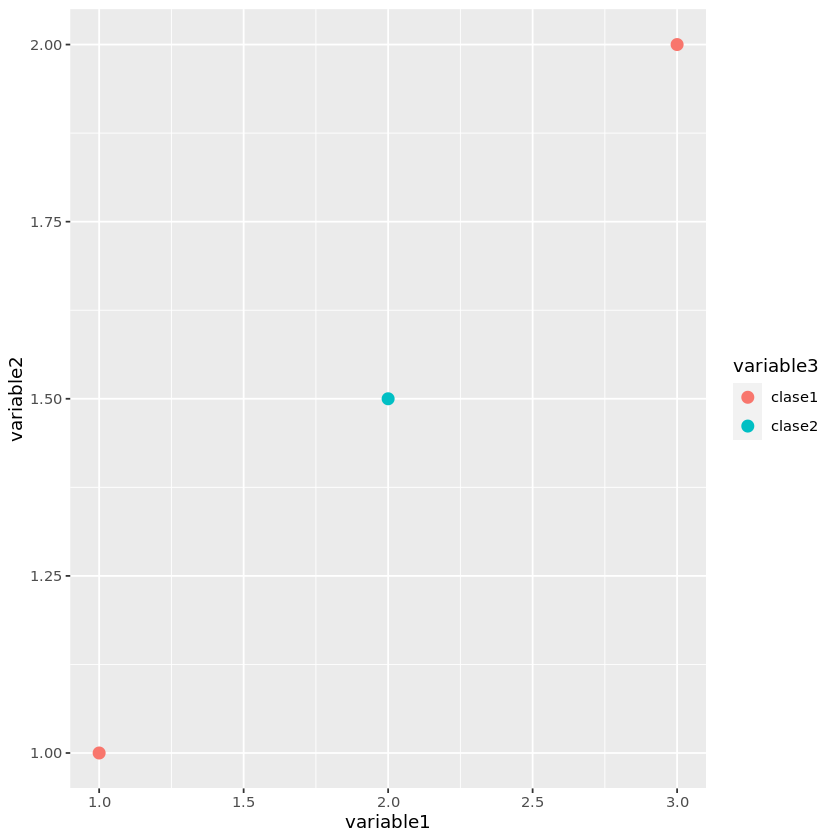

In [21]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color = variable3),
                                size = 3)

O bien si queremos que varíe el **tamaño** de acuerdo a los valores de la `variable3` (aunque no tendría mucho sentido tener tamaños con valores `clase1` o `clase2`)

Warning message:
“Using size for a discrete variable is not advised.”


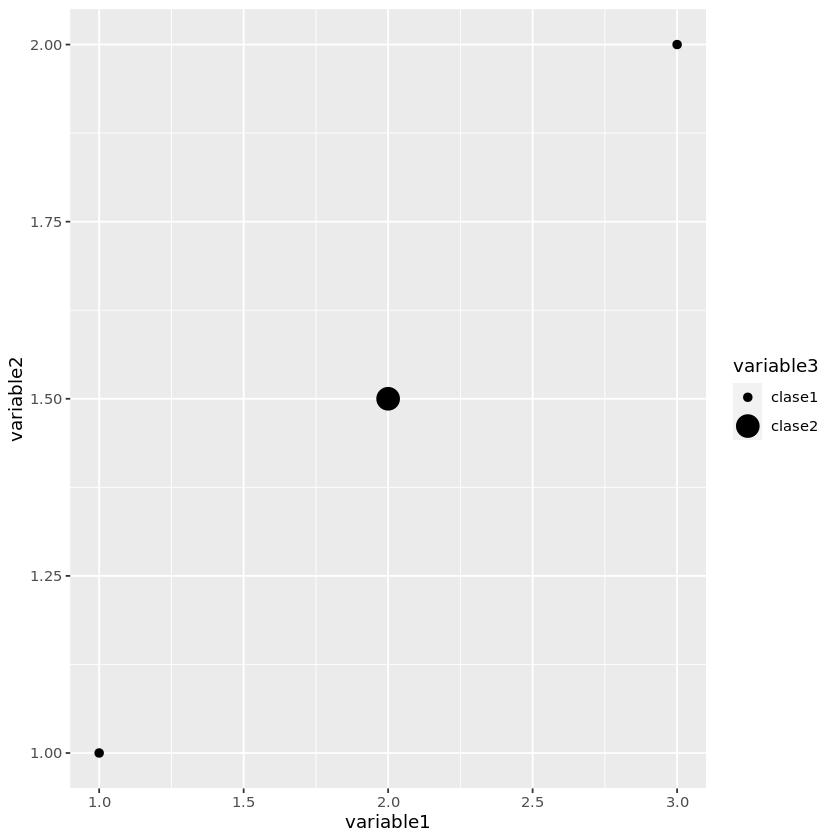

In [22]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, size = variable3))

Cambiando la **forma**:

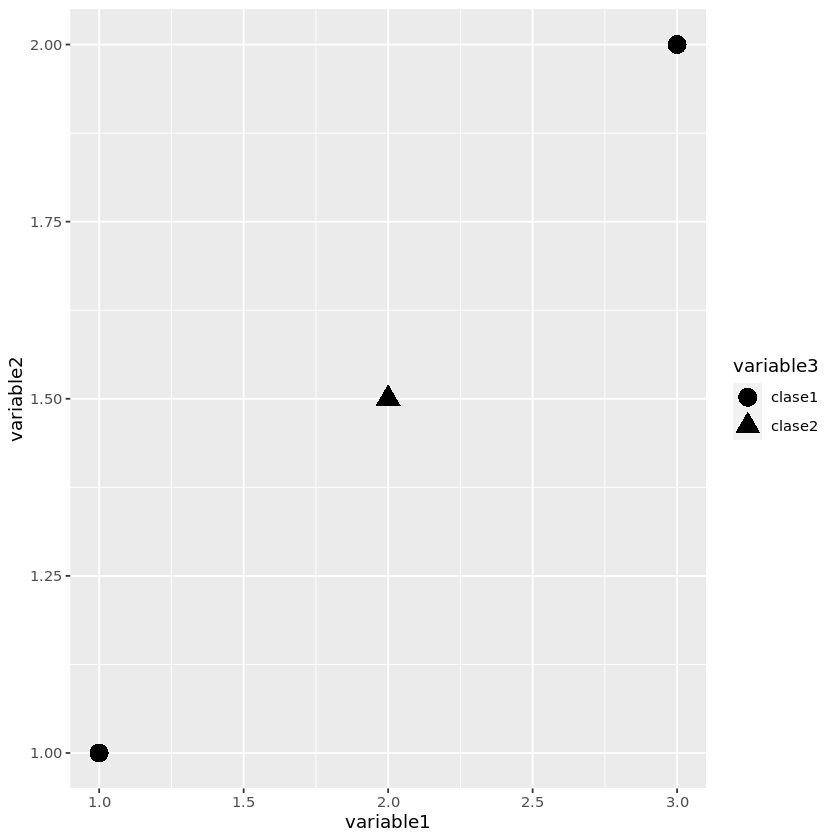

In [42]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, shape = variable3),
                                size = 5)


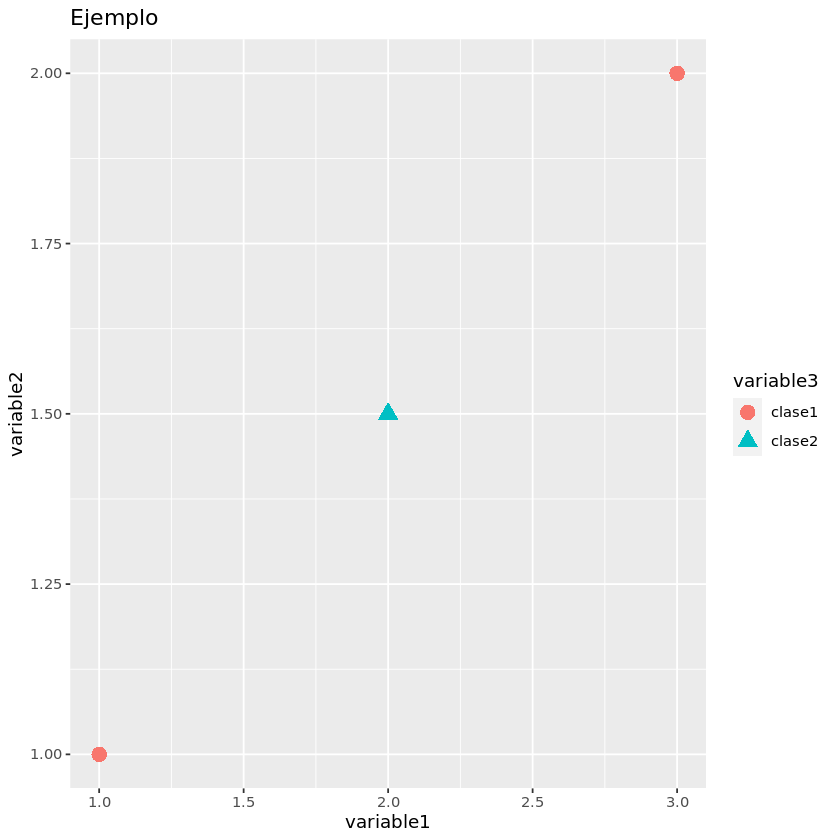

In [44]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color = variable3,
                                    shape = variable3),
                                size = 4)+
                     ggtitle('Ejemplo')

En resúmen la función `aes` dentro de `geom_point` nos ayuda a asociar el nombre de una *aesthetic* con una variable.

Podemos también establecer de forma manual los *aesthetics* por ejemplo:

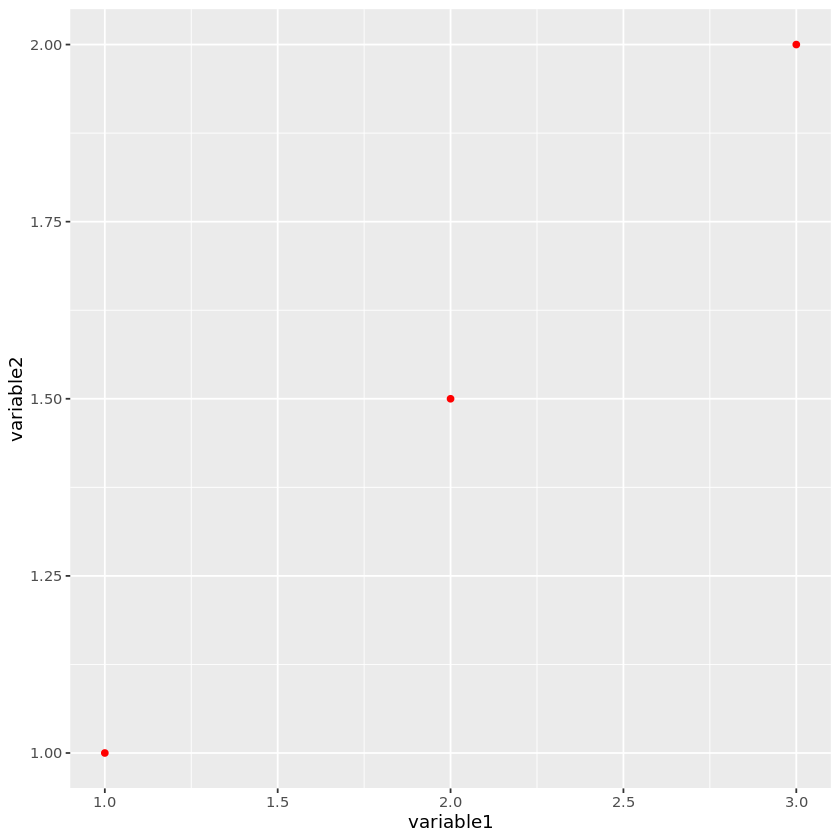

In [16]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2), 
                                color = "red")

El color y tamaño:

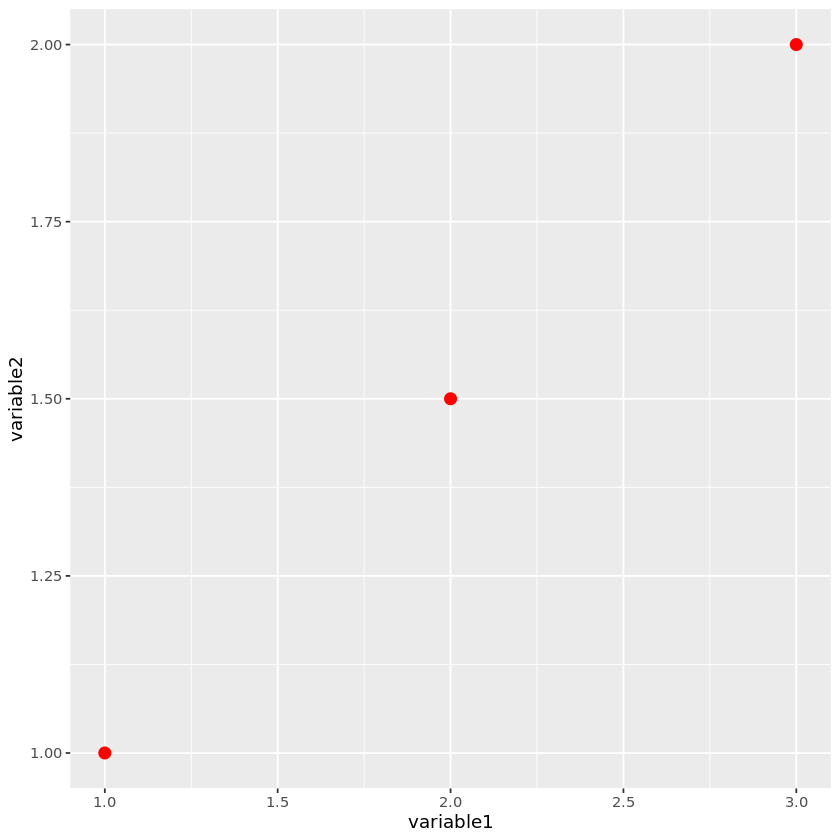

In [17]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2), 
                                color = "red",
                                size=3)

Añadiendo título:

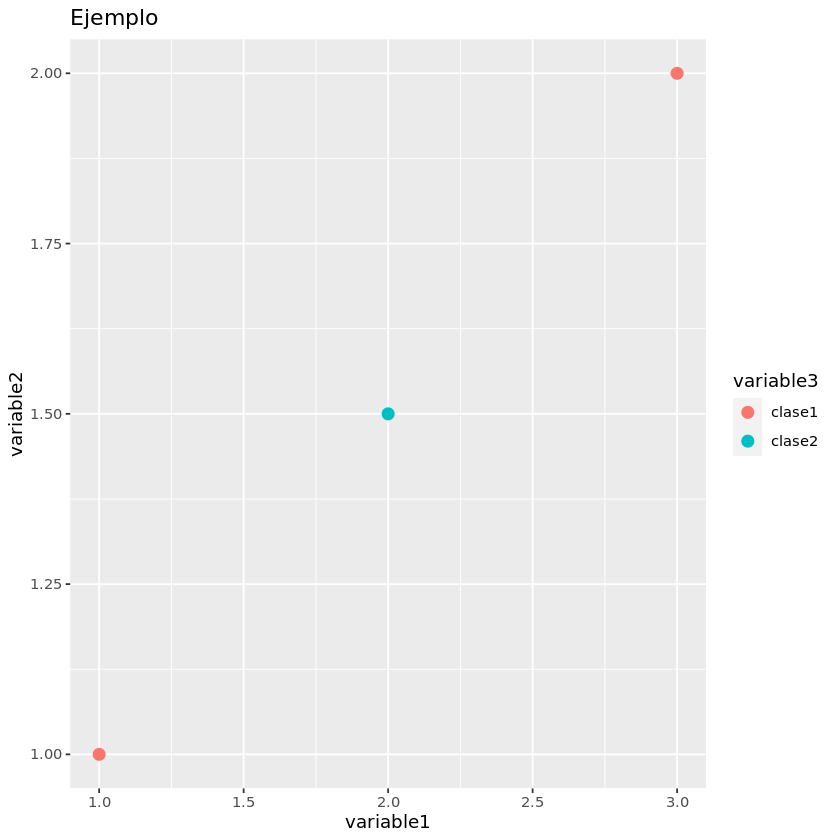

In [30]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3), 
                                size = 3) +
                     ggtitle('Ejemplo')

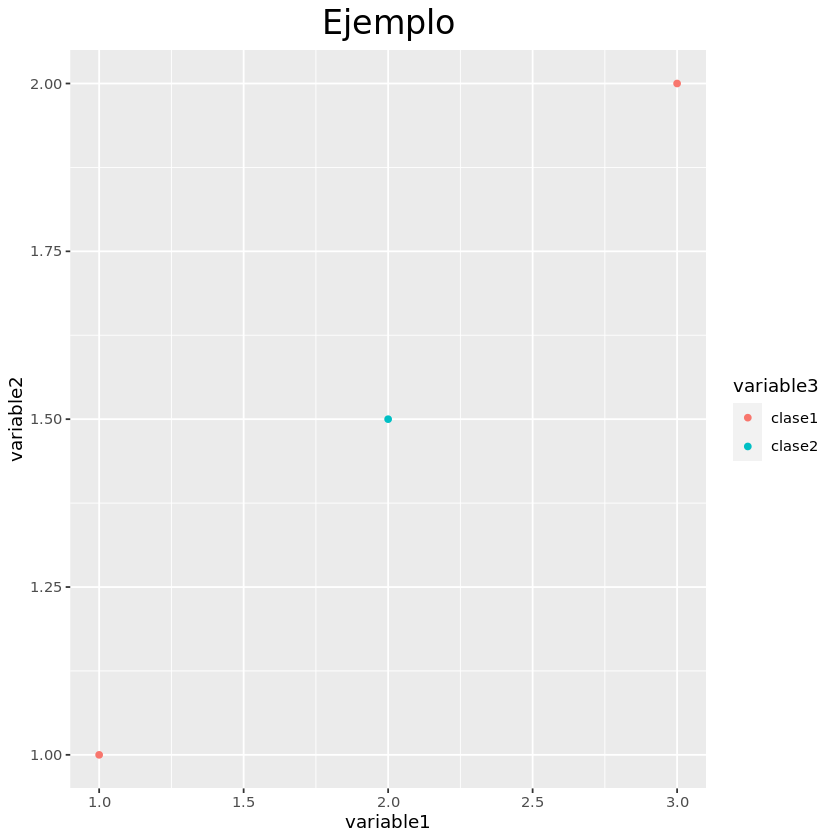

In [33]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3)) +
                     ggtitle('Ejemplo') +
                     theme(plot.title = element_text(size=20, hjust = 0.5))

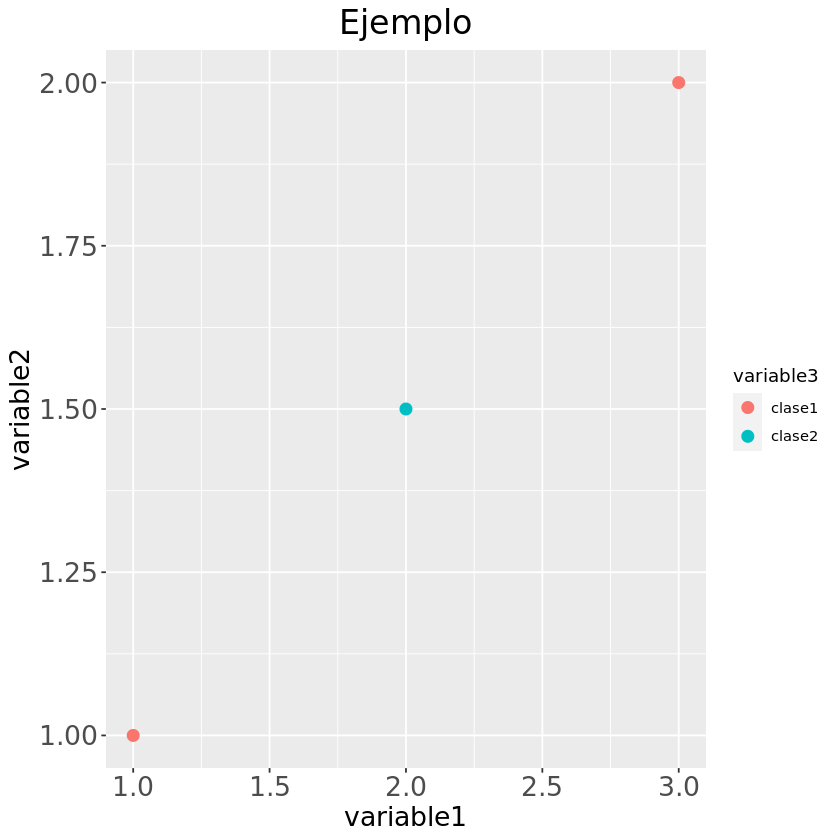

In [35]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3), 
                                size = 3) +
                     ggtitle('Ejemplo') +
                     theme(plot.title = element_text(size=20, hjust = 0.5),
                           axis.text=element_text(size=16),
                           axis.title=element_text(size=16))